In [52]:
# Plantilla de Pre Procesado

# Cómo importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
# Importar el data set
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186924158C8>,
      dtype=object)

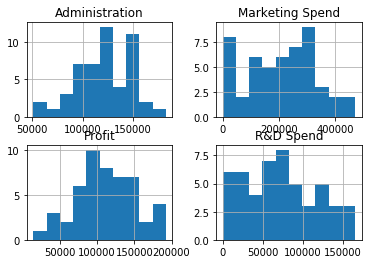

In [56]:
dataset.hist()

In [62]:
dataset.groupby("State").State.count()


State
California    17
Florida       16
New York      17
Name: State, dtype: int64

In [63]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

In [67]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [65]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [68]:
"""
# Escalado de variables
from sklearn.preprocessing import StandardScaler
numericos=X.select_dtypes("number") # separar las columnas numericas
categoricos=X.select_dtypes("object") # seoparar las columnas categoricas
#definir la escala
sc_X = StandardScaler()
#crear nuevo dataframe con los datos numericos escalados
numericos_std =pd.DataFrame(data=sc_X.fit_transform(numericos), columns=numericos.columns.values)
# unir los dataframe de categoricos con el dataframe de los numeicos escalados
X = pd.merge(categoricos,numericos_std, left_index=True, right_index=True)

"""



'\n# Escalado de variables\nfrom sklearn.preprocessing import StandardScaler\nnumericos=X.select_dtypes("number") # separar las columnas numericas\ncategoricos=X.select_dtypes("object") # seoparar las columnas categoricas\n#definir la escala\nsc_X = StandardScaler()\n#crear nuevo dataframe con los datos numericos escalados\nnumericos_std =pd.DataFrame(data=sc_X.fit_transform(numericos), columns=numericos.columns.values)\n# unir los dataframe de categoricos con el dataframe de los numeicos escalados\nX = pd.merge(categoricos,numericos_std, left_index=True, right_index=True)\n\n'

In [69]:
"""
# Normalizado de variables
from sklearn.preprocessing import MinMaxScaler
numericos=X.select_dtypes("number") # separar las columnas numericas
categoricos=X.select_dtypes("object") # seoparar las columnas categoricas
#definir la escala
sc_X = MinMaxScaler()
#crear nuevo dataframe con los datos numericos escalados
numericos_std =pd.DataFrame(data=sc_X.fit_transform(numericos), columns=numericos.columns.values)
# unir los dataframe de categoricos con el dataframe de los numeicos escalados
X = pd.merge(categoricos,numericos_std, left_index=True, right_index=True)
"""


'\n# Normalizado de variables\nfrom sklearn.preprocessing import MinMaxScaler\nnumericos=X.select_dtypes("number") # separar las columnas numericas\ncategoricos=X.select_dtypes("object") # seoparar las columnas categoricas\n#definir la escala\nsc_X = MinMaxScaler()\n#crear nuevo dataframe con los datos numericos escalados\nnumericos_std =pd.DataFrame(data=sc_X.fit_transform(numericos), columns=numericos.columns.values)\n# unir los dataframe de categoricos con el dataframe de los numeicos escalados\nX = pd.merge(categoricos,numericos_std, left_index=True, right_index=True)\n'

In [72]:
# crear un dataframe de variables dummies
dummy_State = pd.get_dummies(X["State"], prefix="state",drop_first=True)
# el argumento drop_first elimina la primera variable para evitar colinealidad
dummy_State

,state_Florida,state_New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [73]:




# Borrar la variable original
X = X.drop(["State"], axis = 1)

# Concatenar las variables dummies con el dataframe original
X = pd.concat([dummy_State, X], axis = 1)

X.head()

,state_Florida,state_New York,R&D Spend,Administration,Marketing Spend
0,0,1,165349.20,136897.80,471784.10
1,0,0,162597.70,151377.59,443898.53
2,1,0,153441.51,101145.55,407934.54
3,0,1,144372.41,118671.85,383199.62
4,1,0,142107.34,91391.77,366168.42


In [91]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [92]:
type(X_train)

pandas.core.frame.DataFrame

In [93]:
type(y_train)


pandas.core.series.Series

In [94]:
print(X_test.head())
print(X_train.head())
print(y_test.head())
print(y_train.head())



    state_Florida  state_New York  R&D Spend  Administration  Marketing Spend
37              0               0   44069.95        51283.14        197029.42
45              0               1    1000.23       124153.04          1903.93
36              1               0   28663.76       127056.21        201126.82
22              1               0   73994.56       122782.75        303319.26
2               1               0  153441.51       101145.55        407934.54
    state_Florida  state_New York  R&D Spend  Administration  Marketing Spend
14              1               0  119943.24       156547.42        256512.92
42              0               0   23640.93        96189.63        148001.11
5               0               1  131876.90        99814.71        362861.36
35              0               1   46014.02        85047.44        205517.64
30              1               0   61994.48       115641.28         91131.24
37     89949.14
45     64926.08
36     90708.19
22    110352.25


In [95]:
# Crear modelo de Regresión Lienal Simple con el conjunto de entrenamiento
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
regression.coef_

array([-1.26238793e+03, -2.31014170e+03,  8.25569687e-01, -4.20149147e-02,
        2.59508890e-02])

In [97]:
regression.intercept_

50877.684335909595

### profit = 42554.167617736966 + -9.59284160e+02* state_florida + 6.99369053e+02 * state_newyork + 7.73467193e-01* R&D + 3.28845975e-02*Admin + 3.66100259e-02+ marketing

In [98]:
# Predecir el conjunto de test
y_pred = regression.predict(X_test)

In [99]:
y_pred[0:5]

array([ 90218.93104586,  44226.43149438,  73160.39175656, 113415.65987268,
       182628.59818795])

In [100]:
y_test.head()

37     89949.14
45     64926.08
36     90708.19
22    110352.25
2     191050.39
Name: Profit, dtype: float64

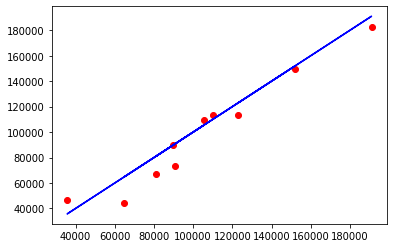

In [101]:
# Visualizar los resultados de entrenamiento
plt.scatter(y_test, y_pred, color = "red")
plt.plot(y_test,y_test,color= "blue")
plt.show()

In [102]:
# encontar el valor de r cuadrado
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9286946258325867

In [103]:
# minimos cuadrados
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

11133.563073396852

In [104]:
# Predecir 
regression.predict([[0,0,20000,30000,50000]]) ##california, 20000 en R&D, 30000 en Administracion  y 50000 en marketing

array([67426.17509515])